## Script to plot results of heterochromatin localization study

In [1]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# specify directory to analyze
myDir=r'S:\ActiveUsers\Kasia\2019_Liu_forMacro\DATA\20190625_decon\results'

Read all the data - original csv files contain measurements for each frame.

In [5]:
myFiles = [f for f in listdir(myDir) if ('nucleusSignal' in f)]

myData=pd.DataFrame()

for f in myFiles:
    
    myData_temp=pd.read_csv(join(myDir, f))
    myData_temp['file']=f
    myData_temp['total']=myData_temp.Area*myData_temp.Mean;
    myData_temp['localization']='nucleus'
    
    try:
        myData = pd.concat([myData,myData_temp],sort=False)
    except:
        myData = myData_temp.copy()
    
    # add euchromatin
    myData_temp=pd.read_csv(join(myDir, f.replace("nucleus", "euChrom")))
    myData_temp['file']=f
    myData_temp['total']=myData_temp.Area*myData_temp.Mean;
    myData_temp['localization']='eu'
    
    myData = pd.concat([myData,myData_temp],sort=False)
    
    # add heterochromatin
    myData_temp=pd.read_csv(join(myDir, f.replace("nucleus", "hetChrom")))
    myData_temp['file']=f
    myData_temp['total']=myData_temp.Area*myData_temp.Mean;
    myData_temp['localization']='het'
    
    myData = pd.concat([myData,myData_temp],sort=False)
    

Summarize data for each cell and then calculate ratios.

In [6]:
myData_cells=myData.groupby(['file','localization'], as_index=False).sum()

In [8]:
myData_cells.head()

,file,localization,Area,Mean,StdDev,Mode,Slice,total
0,20190625_cellde-00.czi_nucleusSignal.csv,eu,694950,74053.932,37917.029,54307.345,893,1.576061e+09
1,20190625_cellde-00.czi_nucleusSignal.csv,het,6770,71760.045,23390.747,61642.250,459,2.821993e+07
2,20190625_cellde-00.czi_nucleusSignal.csv,nucleus,701720,74269.778,37856.180,54545.051,893,1.604280e+09
3,20190625_cellde-01.czi_nucleusSignal.csv,eu,649489,77893.928,45591.068,58442.251,888,1.521750e+09
4,20190625_cellde-01.czi_nucleusSignal.csv,het,5066,75660.414,22221.724,62708.303,475,1.998535e+07


In [9]:
def group_norm(group):
    # find norm factors/group
    area_norm_factor=np.array(group.loc[group.localization=='nucleus','Area'])[0]
    signal_norm_factor=np.array(group.loc[group.localization=='nucleus','total'])[0]
    #modify dataframe
    group['volume_norm']=group.Area/area_norm_factor
    group['signal_norm']=group.total/signal_norm_factor
    return group

In [10]:
myData_cells=myData_cells.groupby(['file'],as_index=False).apply(group_norm)

In [11]:
myData_cells.head()

,file,localization,Area,Mean,StdDev,Mode,Slice,total,volume_norm,signal_norm
0,20190625_cellde-00.czi_nucleusSignal.csv,eu,694950,74053.932,37917.029,54307.345,893,1.576061e+09,0.990352,0.982410
1,20190625_cellde-00.czi_nucleusSignal.csv,het,6770,71760.045,23390.747,61642.250,459,2.821993e+07,0.009648,0.017590
2,20190625_cellde-00.czi_nucleusSignal.csv,nucleus,701720,74269.778,37856.180,54545.051,893,1.604280e+09,1.000000,1.000000
3,20190625_cellde-01.czi_nucleusSignal.csv,eu,649489,77893.928,45591.068,58442.251,888,1.521750e+09,0.992260,0.987037
4,20190625_cellde-01.czi_nucleusSignal.csv,het,5066,75660.414,22221.724,62708.303,475,1.998535e+07,0.007740,0.012963


### Plots

Volume of heterochromatin vs euchromatin.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

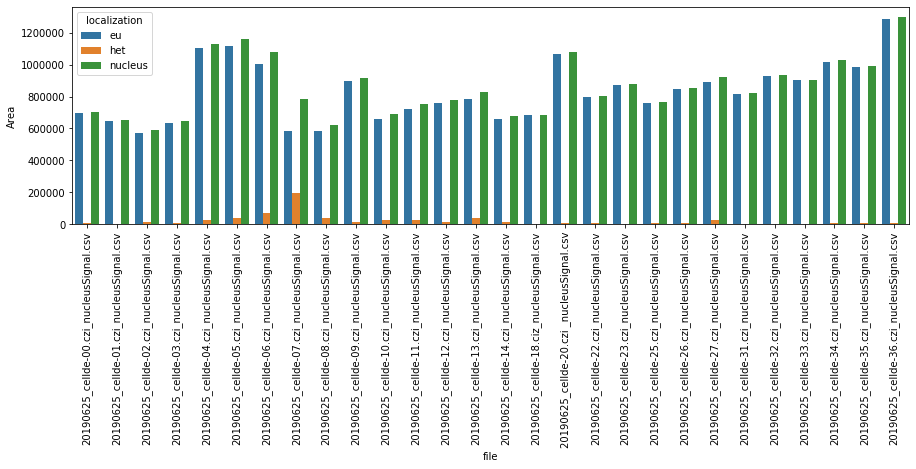

In [12]:
plt.figure(figsize=(15,4))
sns.barplot(x="file", y="Area", hue="localization", data=myData_cells)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

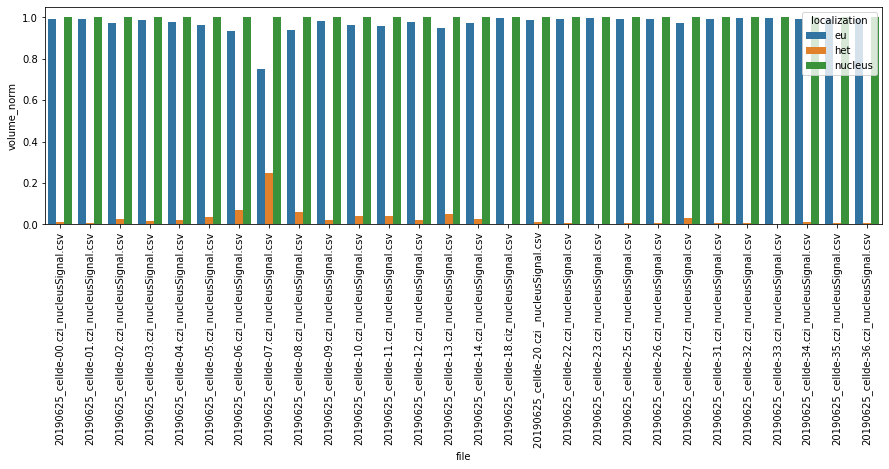

In [13]:
plt.figure(figsize=(15,4))
sns.barplot(x="file", y="volume_norm", hue="localization", data=myData_cells)
plt.xticks(rotation='vertical')

Plot total signal in different structures.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

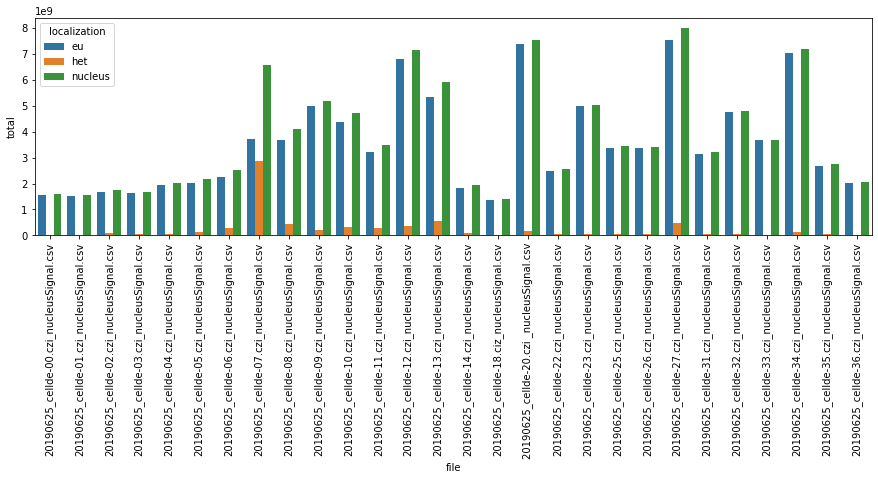

In [14]:
plt.figure(figsize=(15,4))
sns.barplot(x="file", y="total", hue="localization", data=myData_cells)
plt.xticks(rotation='vertical')

Plot ratios in different chromatin structures.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

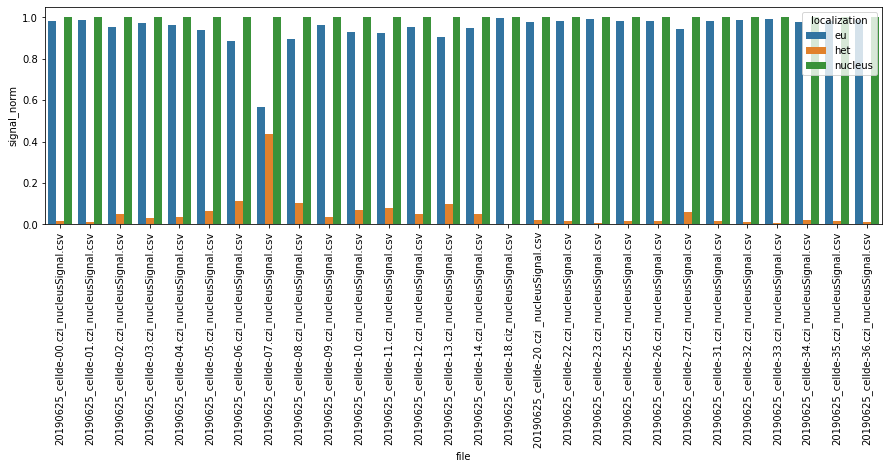

In [15]:
plt.figure(figsize=(15,4))
sns.barplot(x="file", y="signal_norm", hue="localization", data=myData_cells)
plt.xticks(rotation='vertical')